In [2]:
import numpy as np
G1 = np.array( [[50, 69, 93, 76, 88], [15.5, 18.4, 26.4, 22.9, 18.6], [1, 1, 1, 1, 1]] )
G2 = np.array( [[43, 56, 38, 21, 25], [16.9, 21.6, 12.2, 16.0, 10.0], [2, 2, 2, 2, 2]] )
Train = np.vstack([G1.T, G2.T])
Train

array([[50. , 15.5,  1. ],
       [69. , 18.4,  1. ],
       [93. , 26.4,  1. ],
       [76. , 22.9,  1. ],
       [88. , 18.6,  1. ],
       [43. , 16.9,  2. ],
       [56. , 21.6,  2. ],
       [38. , 12.2,  2. ],
       [21. , 16. ,  2. ],
       [25. , 10. ,  2. ]])

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
model.fit(Train[:,[0,1]], Train[:,2])

model.predict( [[40, 19],] )

array([2.])

In [10]:
model.predict(Train[:,[0,1]])


array([2., 1., 1., 1., 1., 2., 2., 2., 2., 2.])

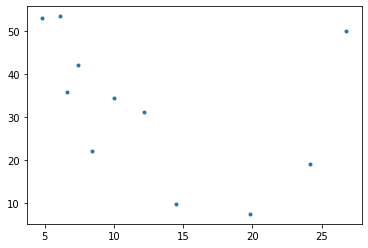

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x1 = [6.6, 8.4, 24.2, 10.0, 14.5, 12.2, 4.8, 19.8, 6.1, 26.8, 7.4]
x2 = [35.8, 22.1, 19.1, 34.4, 9.9, 31.1, 53.0, 7.5, 53.4, 50.0, 42.1]

plt.plot(x1, x2, '.')

array([3, 3, 1, 3, 1, 3, 2, 1, 2, 4, 3], dtype=int32)

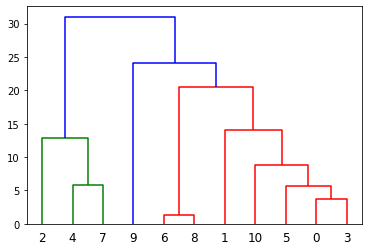

In [18]:
data = np.array([x1, x2]).T
data

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
Z = linkage(data, method='average', metric='euclidean')
# クラスター間距離の測り方: method = single, complete, average, ward

dendrogram(Z)

cut_point = 17
Ans = fcluster(Z, cut_point, criterion='distance')
Ans

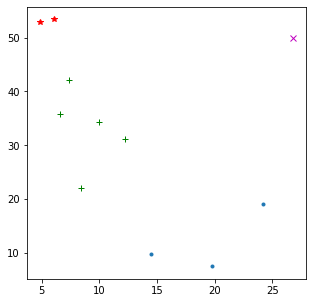

In [24]:
c1 = data[np.where(Ans == 1)[0], :]
c2 = data[np.where(Ans == 2)[0], :]
c3 = data[np.where(Ans == 3)[0], :]
c4 = data[np.where(Ans == 4)[0], :]

fig = plt.figure(figsize=(5, 5))
plt.plot(c1[:,0], c1[:,1], '.')
plt.plot(c2[:,0], c2[:,1], 'r*')
plt.plot(c3[:,0], c3[:,1], 'g+')
plt.plot(c4[:,0], c4[:,1], 'mx')

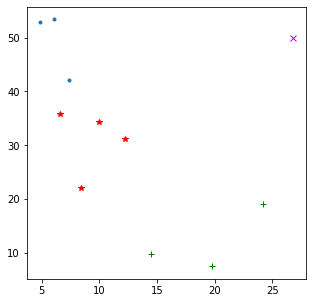

In [26]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
model.fit( data )

ans = model.labels_
ans

c1 = data[np.where(ans == 0)[0], :]
c2 = data[np.where(ans == 1)[0], :]
c3 = data[np.where(ans == 2)[0], :]
c4 = data[np.where(ans == 3)[0], :]

fig = plt.figure(figsize=(5, 5))
plt.plot(c1[:,0], c1[:,1], '.')
plt.plot(c2[:,0], c2[:,1], 'r*')
plt.plot(c3[:,0], c3[:,1], 'g+')
plt.plot(c4[:,0], c4[:,1], 'mx')

In [27]:
x1 = [86, 71, 42, 62, 96, 39, 50, 78, 51, 89]
x2 = [79, 75, 43, 58, 97, 33, 53, 66, 44, 92]
x3 = [67, 78, 39, 98, 61, 45, 64, 52, 76, 93]
x4 = [68, 84, 44, 95, 63, 50, 72, 47, 72, 91]

# 標準化
x1_h = ( x1-np.mean(x1) ) / np.std(x1, ddof=1)
x2_h = ( x2-np.mean(x2) ) / np.std(x2, ddof=1)
x3_h = ( x3-np.mean(x3) ) / np.std(x3, ddof=1)
x4_h = ( x4-np.mean(x4) ) / np.std(x4, ddof=1)

data = np.array([x1_h, x2_h, x3_h, x4_h]).T
data

array([[ 0.95406283,  0.6958578 , -0.01548941, -0.03337686],
       [ 0.22391271,  0.51029572,  0.5524556 ,  0.85667266],
       [-1.18771087, -0.97420092, -1.46116762, -1.36845113],
       [-0.21417737, -0.27834312,  1.58508289,  1.4685817 ],
       [ 1.44082958,  1.53088716, -0.3252776 , -0.31151733],
       [-1.3337409 , -1.43810612, -1.15137943, -1.03468256],
       [-0.79829747, -0.51029572, -0.1703835 ,  0.18913552],
       [ 0.56464943,  0.09278104, -0.78995988, -1.20156685],
       [-0.7496208 , -0.9278104 ,  0.44919287,  0.18913552],
       [ 1.10009286,  1.29893456,  1.32692607,  1.24606933]])

In [28]:
model = KMeans(n_clusters=2)
model.fit( data )
ans = model.labels_
ans

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 1], dtype=int32)

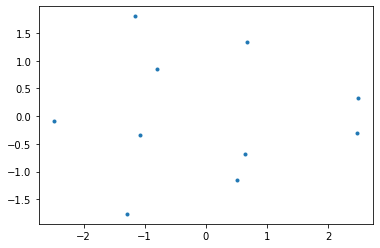

In [33]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(data)
z = model.transform(data)
plt.plot(z[:,0],z[:,1],'.')

In [34]:
model = KMeans(n_clusters=4)
model.fit( data )
ans = model.labels_
ans


array([2, 1, 0, 1, 2, 0, 3, 2, 3, 1], dtype=int32)